# Check how different types of noise manifest in spectrogram

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy import signal
import h5py

In [9]:
from utils import get_normalized_spgram
from data_augmentation import TransientMaker

### Import data and add noise to transients

In [10]:
idx_in_file = 0
with h5py.File('../sample_data.h5') as hf:
    fid = hf["ground_truth_fids"][()][idx_in_file : idx_in_file + 1]
    ppm = hf["ppm"][()][idx_in_file : idx_in_file + 1]
    t = hf["t"][()][idx_in_file : idx_in_file + 1]

transientmkr = TransientMaker(fids=fid, t=t, n_transients=160)
transientmkr.add_random_amplitude_noise(noise_level_base=20, 
                                        noise_level_scan_var=2)
transientmkr.add_random_frequency_noise(noise_level_base=40, 
                                        noise_level_scan_var=2)
transientmkr.add_random_phase_noise(noise_level_base=60, 
                                        noise_level_scan_var=2)
corrupt_fid_all = transientmkr.fids

transientmkr = TransientMaker(fids=fid, t=t, n_transients=160)
transientmkr.add_random_amplitude_noise(noise_level_base=10, 
                                        noise_level_scan_var=2)
corrupt_fid_only_amp = transientmkr.fids

transientmkr = TransientMaker(fids=fid, t=t, n_transients=160)
transientmkr.add_random_frequency_noise(noise_level_base=40, 
                                        noise_level_scan_var=2)
corrupt_fid_only_freq = transientmkr.fids

transientmkr = TransientMaker(fids=fid, t=t, n_transients=160)
transientmkr.add_random_phase_noise(noise_level_base=60, 
                                        noise_level_scan_var=2)
corrupt_fid_only_phase = transientmkr.fids

### Generate spectrograms

In [11]:
stft_gt = get_normalized_spgram(fid=fid[0,:,1]-fid[0,:,0], 
                                         fs=2000, 
                                         larmorfreq=127.73, 
                                         linear_shift=3, 
                                         window_size=600, 
                                         hop_size=8, 
                                         window=signal.windows.hann(600,sym=True))

stft_corrupt_all = get_normalized_spgram(fid=np.mean(corrupt_fid_all[0,:,1,:]-corrupt_fid_all[0,:,0,:],axis=-1), 
                                         fs=2000, 
                                         larmorfreq=127.73, 
                                         linear_shift=3, 
                                         window_size=600, 
                                         hop_size=8, 
                                         window=signal.windows.hann(600,sym=True))

stft_corrupt_only_amp = get_normalized_spgram(fid=np.mean(corrupt_fid_only_amp[0,:,1,:]-corrupt_fid_only_amp[0,:,0,:],axis=-1), 
                                         fs=2000, 
                                         larmorfreq=127.73, 
                                         linear_shift=3, 
                                         window_size=600, 
                                         hop_size=8, 
                                         window=signal.windows.hann(600,sym=True))

stft_corrupt_only_freq = get_normalized_spgram(fid=np.mean(corrupt_fid_only_freq[0,:,1,:]-corrupt_fid_only_freq[0,:,0,:],axis=-1), 
                                         fs=2000, 
                                         larmorfreq=127.73, 
                                         linear_shift=3, 
                                         window_size=600, 
                                         hop_size=8, 
                                         window=signal.windows.hann(600,sym=True))

stft_corrupt_only_phase = get_normalized_spgram(fid=np.mean(corrupt_fid_only_phase[0,:,1,:]-corrupt_fid_only_phase[0,:,0,:],axis=-1), 
                                         fs=2000, 
                                         larmorfreq=127.73, 
                                         linear_shift=3, 
                                         window_size=600, 
                                         hop_size=8, 
                                         window=signal.windows.hann(600,sym=True))

### Visualize noisy spectrograms

(0.0, 1.0, 0.0, 1.0)

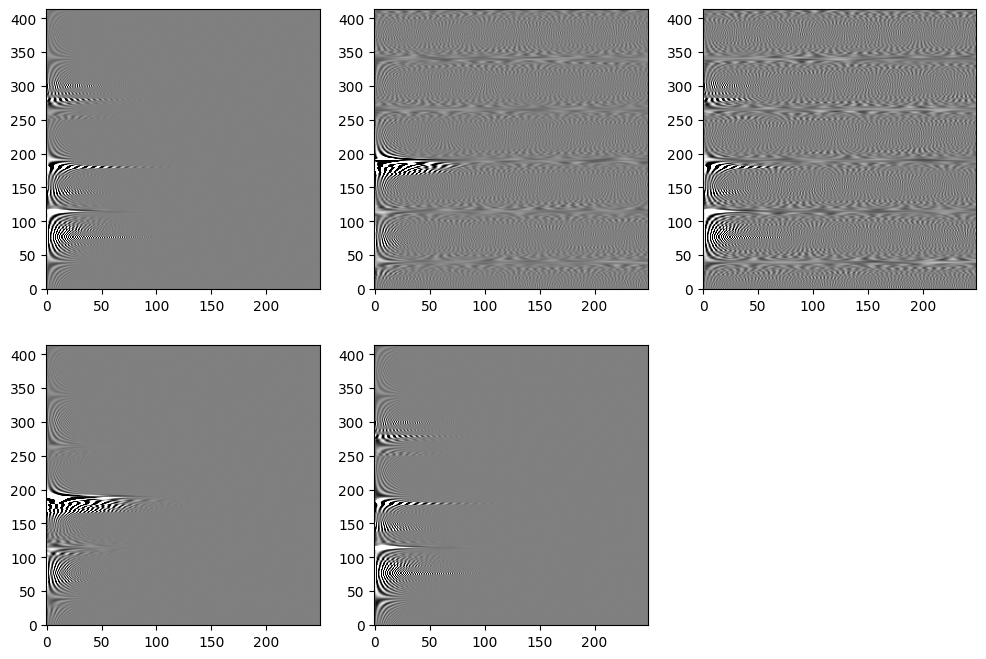

In [12]:
fig, ax = plt.subplots(2,3,figsize=(12,8))
ax.flat[0].imshow(np.real(np.flip(stft_gt,axis=0)),cmap='gray',vmin=-0.04,vmax=0.04,aspect='auto',origin='lower')
ax.flat[1].imshow(np.real(np.flip(stft_corrupt_all,axis=0)),cmap='gray',vmin=-0.04,vmax=0.04,aspect='auto',origin='lower')
ax.flat[2].imshow(np.real(np.flip(stft_corrupt_only_amp,axis=0)),cmap='gray',vmin=-0.04,vmax=0.04,aspect='auto',origin='lower')
ax.flat[3].imshow(np.real(np.flip(stft_corrupt_only_freq,axis=0)),cmap='gray',vmin=-0.04,vmax=0.04,aspect='auto',origin='lower')
ax.flat[4].imshow(np.real(np.flip(stft_corrupt_only_phase,axis=0)),cmap='gray',vmin=-0.04,vmax=0.04,aspect='auto',origin='lower')
ax.flat[5].axis('off')

### Visualize projections in frequency

(0.0, 1.0, 0.0, 1.0)

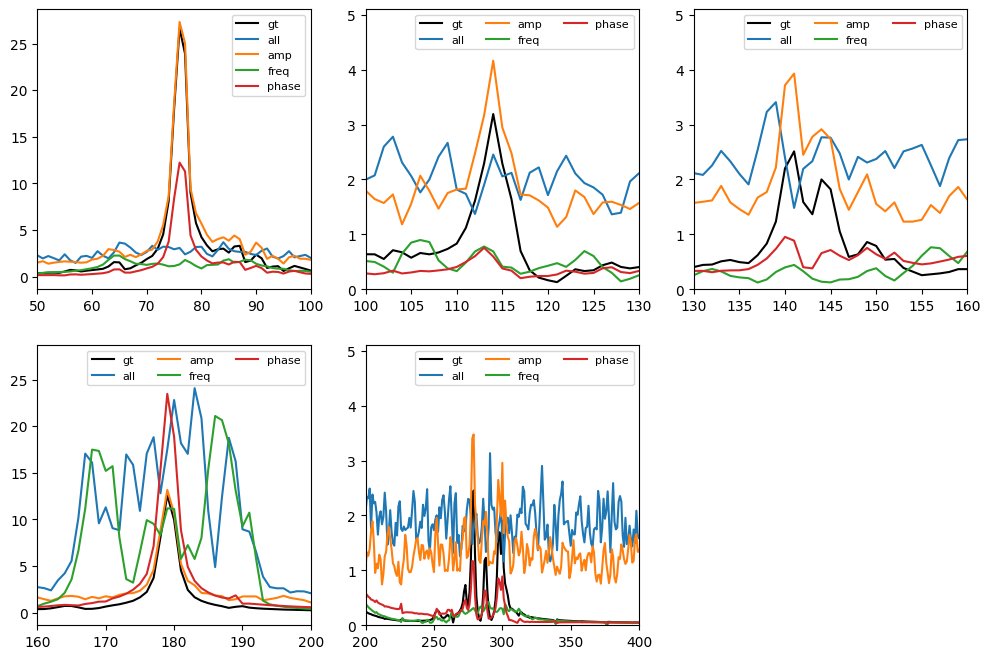

In [6]:
fig, ax = plt.subplots(2,3,figsize=(12,8))
for i in range(5):
    ax.flat[i].plot(np.sum(np.abs(np.real(np.flip(stft_gt,axis=0))),axis=1),label='gt',color='black')
    ax.flat[i].plot(np.sum(np.abs(np.real(np.flip(stft_corrupt_all,axis=0))),axis=1),label='all')
    ax.flat[i].plot(np.sum(np.abs(np.real(np.flip(stft_corrupt_only_amp,axis=0))),axis=1),label='amp')
    ax.flat[i].plot(np.sum(np.abs(np.real(np.flip(stft_corrupt_only_freq,axis=0))),axis=1),label='freq')
    ax.flat[i].plot(np.sum(np.abs(np.real(np.flip(stft_corrupt_only_phase,axis=0))),axis=1),label='phase')
    if i == 0:
        ax.flat[i].legend(loc='upper right',fontsize=8)
    else:
        ax.flat[i].legend(loc='upper right',fontsize=8,ncols=3)
ax.flat[0].set_xlim(50,100)
ax.flat[1].set_xlim(100,130)
ax.flat[1].set_ylim(0,5.1)
ax.flat[2].set_xlim(130,160)
ax.flat[2].set_ylim(0,5.1)
ax.flat[3].set_xlim(160,200)
ax.flat[4].set_xlim(200,400)
ax.flat[4].set_ylim(0,5.1)
ax.flat[5].axis('off')